In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [37]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [38]:
train_df = pd.read_csv("hacktrain.csv")
test_df = pd.read_csv("hacktest.csv")

In [39]:
train_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
test_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

In [40]:
ndvi_cols = [col for col in train_df.columns if "_N" in col]

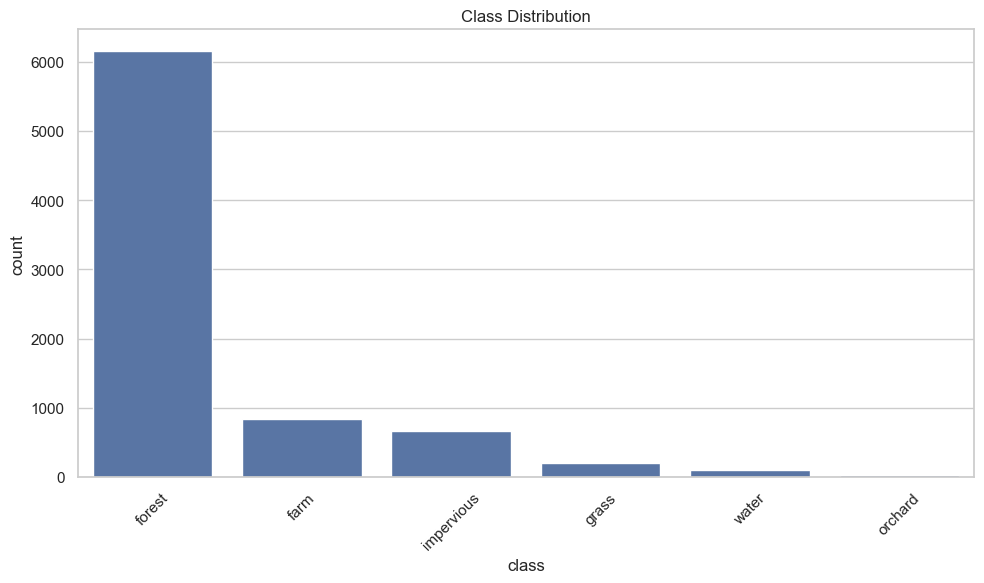

In [41]:
plt.figure()
sns.countplot(data=train_df, x="class", order=train_df["class"].value_counts().index)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

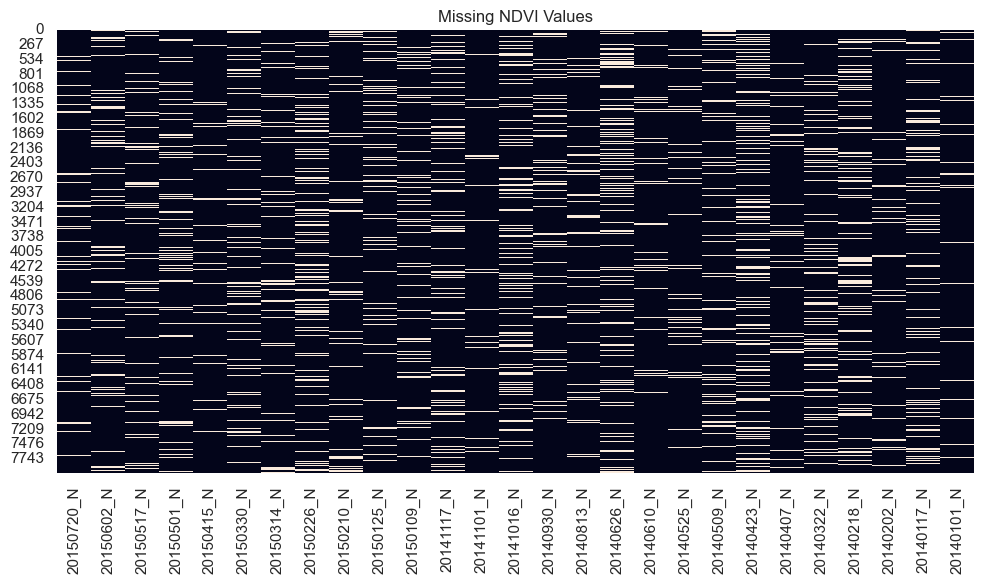

In [42]:
plt.figure()
sns.heatmap(train_df[ndvi_cols].isnull(), cbar=False)
plt.title("Missing NDVI Values")
plt.tight_layout()
plt.show()

In [43]:
imputer = SimpleImputer(strategy="mean")
train_df[ndvi_cols] = imputer.fit_transform(train_df[ndvi_cols])
test_df[ndvi_cols] = imputer.transform(test_df[ndvi_cols])

In [44]:
def extract_features(df):
    features = pd.DataFrame()
    features['ID'] = df['ID']
    features['mean_ndvi'] = df[ndvi_cols].mean(axis=1)
    features['std_ndvi'] = df[ndvi_cols].std(axis=1)
    features['max_ndvi'] = df[ndvi_cols].max(axis=1)
    features['min_ndvi'] = df[ndvi_cols].min(axis=1)
    features['range_ndvi'] = features['max_ndvi'] - features['min_ndvi']
    features['skew_ndvi'] = df[ndvi_cols].skew(axis=1)
    features['kurt_ndvi'] = df[ndvi_cols].kurt(axis=1)

    time_indices = np.arange(len(ndvi_cols))
    features['ndvi_trend'] = df[ndvi_cols].apply(lambda row: np.polyfit(time_indices, row, 1)[0], axis=1)
    
    return features

In [45]:
X_train = extract_features(train_df)
X_test = extract_features(test_df)

In [46]:
le = LabelEncoder()
y_train = le.fit_transform(train_df["class"])

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=["ID"]))
X_test_scaled = scaler.transform(X_test.drop(columns=["ID"]))

In [48]:
model = LogisticRegression(solver="lbfgs", max_iter=1000)

model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [49]:
y_pred_test = model.predict(X_test_scaled)
predicted_labels = le.inverse_transform(y_pred_test)

In [50]:
submission = pd.DataFrame({
    "ID": X_test["ID"],
    "class": predicted_labels
})

In [51]:
submission.to_csv("submission.csv", index=False)
print("Submission saved to submission.csv")
submission.head()

Submission saved to submission.csv


,ID,class
0,1,forest
1,2,forest
2,3,forest
3,4,forest
4,5,forest
